Weighted Pre-Treatment Speed: 16.00 mph
Weighted Post-Treatment Speed: 15.79 mph
T-Statistic: -18.559, P-Value: 0.000


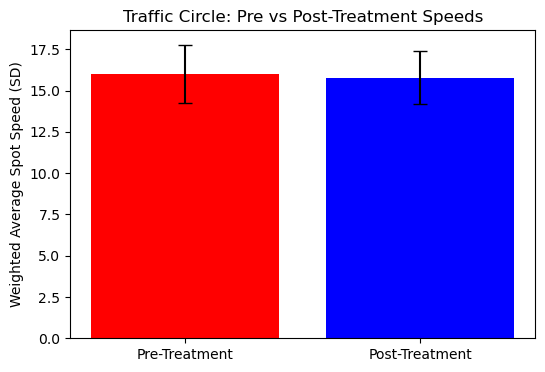

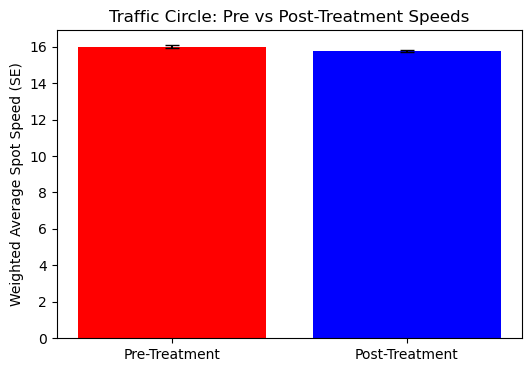

Highest value for pre-treatment'85th Speed Percentile': 30.0 mph Highest value for post-treatment'85th Speed Percentile': 35.0 mph
Row details:
Data Periods                                          Jan 01, 2019 - Jun 01, 2019
Mode of Travel                             All Vehicles - StL All Vehicles Volume
Zone ID                                                                       NaN
Zone Name                                                           Altura Street
Zone Is Pass-Through                                                          yes
Zone Direction (degrees)                                                      269
Zone is Bi-Direction                                                          yes
Year-Month                                                                2019-02
Day Type                                                      4: Thursday (Th-Th)
Day Part                                                     4: Peak PM (3pm-7pm)
Average Daily Spot Traffic (StL Volu

,Data Periods,Mode of Travel,Zone ID,Zone Name,Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,Day Part,Average Daily Spot Traffic (StL Volume),Avg Spot Speed (mph),Free Flow Speed (mph),Free Flow Factor,5th Speed Percentile,75th Speed Percentile,85th Speed Percentile,95th Speed Percentile
34,"Jan 01, 2019 - Jun 01, 2019",All Vehicles - StL All Vehicles Volume,NaN,Altura Street,yes,269,yes,2019-01,5: Friday (F-F),4: Peak PM (3pm-7pm),223,17.0,22.773,0.758,7.0,19.0,21.0,45.0
257,"Jan 01, 2019 - Jun 01, 2019",All Vehicles - StL All Vehicles Volume,NaN,Altura Street (1),yes,269,yes,2019-01,2: Tuesday (Tu-Tu),5: Late PM (7pm-12am),180,16.0,19.498,0.805,3.0,18.0,21.0,43.0
352,"Jan 01, 2019 - Jun 01, 2019",All Vehicles - StL All Vehicles Volume,NaN,Altura Street (1),yes,269,yes,2019-03,2: Tuesday (Tu-Tu),4: Peak PM (3pm-7pm),226,14.0,18.797,0.763,3.0,18.0,18.0,32.0
129,"Jan 01, 2019 - Jun 01, 2019",All Vehicles - StL All Vehicles Volume,NaN,Altura Street,yes,269,yes,2019-03,5: Friday (F-F),3: Mid-Day (10am-3pm),148,18.0,27.263,0.660,7.0,26.0,28.0,31.0
430,"Jan 01, 2019 - Jun 01, 2019",All Vehicles - StL All Vehicles Volume,NaN,Altura Street (1),yes,269,yes,2019-04,7: Sunday (Su-Su),4: Peak PM (3pm-7pm),90,15.0,17.191,0.853,3.0,19.0,20.0,31.0
45,"Jan 01, 2019 - Jun 01, 2019",All Vehicles - StL All Vehicles Volume,NaN,Altura Street,yes,269,yes,2019-01,7: Sunday (Su-Su),3: Mid-Day (10am-3pm),160,19.0,22.773,0.814,11.0,23.0,24.0,31.0
76,"Jan 01, 2019 - Jun 01, 2019",All Vehicles - StL All Vehicles Volume,NaN,Altura Street,yes,269,yes,2019-02,4: Thursday (Th-Th),4: Peak PM (3pm-7pm),143,21.0,26.213,0.784,6.0,27.0,30.0,31.0
104,"Jan 01, 2019 - Jun 01, 2019",All Vehicles - StL All Vehicles Volume,NaN,Altura Street,yes,269,yes,2019-03,1: Monday (M-M),2: Peak AM (6am-10am),444,19.0,27.263,0.700,11.0,23.0,27.0,30.0
74,"Jan 01, 2019 - Jun 01, 2019",All Vehicles - StL All Vehicles Volume,NaN,Altura Street,yes,269,yes,2019-02,4: Thursday (Th-Th),2: Peak AM (6am-10am),687,19.0,26.213,0.714,7.0,23.0,25.0,29.0
309,"Jan 01, 2019 - Jun 01, 2019",All Vehicles - StL All Vehicles Volume,NaN,Altura Street (1),yes,269,yes,2019-02,3: Wednesday (W-W),3: Mid-Day (10am-3pm),169,18.0,22.939,0.769,9.0,22.0,23.0,29.0


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

pre_treatment = pd.read_csv('data/Tennessee_pre2.csv')
post_treatment = pd.read_csv('data/Hancock_post.csv')

pre_filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
post_filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')

pre_treatment = pre_treatment[~pre_filters]
post_treatment = post_treatment[~post_filters]

def filter_outliers(df, column, threshold=3):
    valid_values = df[column].dropna()
    z_scores = stats.zscore(valid_values)
    valid_indices = valid_values.index[np.abs(z_scores) < threshold]
    return df.loc[valid_indices]



pre_speeds = pre_treatment['Avg Spot Speed (mph)']
post_speeds = post_treatment['Avg Spot Speed (mph)']
pre_volume = pre_treatment['Average Daily Spot Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Spot Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)
pre_weighted_se = weighted_std(pre_speeds, pre_volume) / (len(pre_speeds) ** 0.5)
post_weighted_se = weighted_std(post_speeds, post_volume) / (len(post_speeds) ** 0.5)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)
plt.ylabel('Weighted Average Spot Speed (SD)')
plt.title('Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Spot Speed (SE)')
plt.title('Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

max_85th_speed_row_pre = pre_treatment.loc[pre_treatment['85th Speed Percentile'].idxmax()]
max_85th_speed_row_post = post_treatment.loc[post_treatment['85th Speed Percentile'].idxmax()]

max_85th_speed_value_pre = max_85th_speed_row_pre['85th Speed Percentile']
max_85th_speed_value_post = max_85th_speed_row_post['85th Speed Percentile']

print(f"Highest value for pre-treatment'85th Speed Percentile': {max_85th_speed_value_pre} mph",
     f"Highest value for post-treatment'85th Speed Percentile': {max_85th_speed_value_post} mph")
print("Row details:")
print(max_85th_speed_row_pre,max_85th_speed_row_post )
top_speed = pre_treatment.sort_values('95th Speed Percentile', ascending = False).head(10)
top_speed